<h1>Traffic Analysis & Prediction¶<h1>
   
A Report for Tasty Bytes

In [1]:
# Import required libraries (data val, cleaning, EDA)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('recipe_site_traffic_2212.csv')

In [3]:
df.head(10)

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN
5,6,691.15,3.46,1.65,53.93,One Dish Meal,2,High
6,7,183.94,47.95,9.75,46.71,Chicken Breast,4,NaN
7,8,299.14,3.17,0.40,32.40,Lunch/Snacks,4,NaN
8,9,538.52,3.78,3.37,3.79,Pork,6,High
9,10,248.28,48.54,3.99,113.85,Chicken,2,NaN


In [4]:
x, y = df.shape
print(f"There are {x} rows in the dataset")

There are 947 rows in the dataset


In [5]:
df.isnull().sum()

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

In [6]:
df_null = df[df.drop(columns='high_traffic').isnull().any(axis=1)]
df_null

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
23,24,NaN,NaN,NaN,NaN,Meat,2,NaN
48,49,NaN,NaN,NaN,NaN,Chicken Breast,4,NaN
82,83,NaN,NaN,NaN,NaN,Meat,4,High
89,90,NaN,NaN,NaN,NaN,Pork,6,High
116,117,NaN,NaN,NaN,NaN,Chicken Breast,6,High
121,122,NaN,NaN,NaN,NaN,Dessert,2,High
136,137,NaN,NaN,NaN,NaN,One Dish Meal,2,High
149,150,NaN,NaN,NaN,NaN,Potato,2,High
187,188,NaN,NaN,NaN,NaN,Pork,4,High


In [7]:
df.groupby(['category', 'servings']).agg({
     'calories': ['mean', 'median', 'max', 'min', 'std'],
     'protein': ['mean', 'median', 'max', 'min', 'std'],
     'sugar': ['mean', 'median', 'max', 'min', 'std'],
     'carbohydrate': ['mean', 'median', 'max', 'min', 'std']}).reset_index()

category      servings     calories                              \
                                         mean    median      max      min   
0        Beverages             1   180.341000   154.465   463.52    11.57   
1        Beverages             2   245.478824   199.340   836.95    21.09   
2        Beverages             4   162.894706   129.450   581.97     0.30   
3        Beverages             6   144.427619    88.170   502.89     0.54   
4        Breakfast             1   401.969615   253.465  1724.25     0.64   
5        Breakfast             2   374.082857   313.530  1335.54    34.97   
6        Breakfast             4   266.214634   166.850   988.66     3.07   
7        Breakfast             6   330.973889   272.125   958.28    16.58   
8          Chicken             1   419.004000   309.670  1568.00    46.66   
9          Chicken             2   573.600000   452.510  2051.34    85.17   
10         Chicken             4   703.353667   377.595  3633.16    98.67   
11         Chicken             6   387.458182   299.320   883.12    84.91   
12  Chicken Breast             1   611.538000   518.530  1878.82     2.98   
13  Chicken Breast             2   447.079375   314.600  1716.03    41.92   
14  Chicken Breast             4   469.466154   347.060  1550.20    24.05   
15  Chicken Breast             6   689.400526   544.010  2283.29     0.80   
16         Dessert             1   317.120625   263.920   959.51     4.41   
17         Dessert             2   256.160769   239.900   899.53     0.59   
18         Dessert             4   372.850714   290.220   920.73    11.60   
19         Dessert             6   410.706000   301.490  1588.26    29.19   
20    Lunch/Snacks             1   591.517059   515.490  1435.35     7.55   
21    Lunch/Snacks             2   473.288000   362.780  1243.90     0.14   
22    Lunch/Snacks             4   422.053448   299.140  1266.75    20.81   
23    Lunch/Snacks  4 as a snack  1028.140000  1028.140  1542.53   513.75   
24    Lunch/Snacks             6   354.108333   303.305   850.16     6.23   
25    Lunch/Snacks  6 as a snack  1440.690000  1440.690  1440.69  1440.69   
26            Meat             1   659.651538   641.050  1695.82     9.52   
27            Meat             2   636.413077   504.200  1375.20    64.15   
28            Meat             4   571.235588   452.395  1706.75     5.87   
29            Meat             6   498.903571   394.785  1205.68    12.25   
30   One Dish Meal             1   770.896923   557.660  2332.32    13.62   
31   One Dish Meal             2   534.366818   436.715  2081.69    51.81   
32   One Dish Meal             4   570.316667   372.270  2282.60    23.64   
33   One Dish Meal             6   458.604545   448.590  1070.05    62.59   
34            Pork             1   716.210000   416.010  2122.24    44.15   
35            Pork             2   565.615625   391.745  1356.45    25.21   
36            Pork             4   575.858485   388.440  1767.53     1.56   
37            Pork             6   764.641333   538.520  2906.01    10.66   
38          Potato             1   616.695000   394.165  2068.07    94.27   
39          Potato             2   312.203000   267.605   682.73    23.45   
40          Potato             4   432.185000   327.690  1228.14    27.65   
41          Potato             6   346.359565   263.040  1054.40     9.26   
42       Vegetable             1   222.646667   164.300   575.07    12.24   
43       Vegetable             2   175.022222   115.000   674.84     0.76   
44       Vegetable             4   247.720000   107.710  1053.49     7.39   
45       Vegetable             6   336.862857   248.960  1337.71    31.65   

                  protein                  ...      sugar                  \
           std       mean  median     max  ...       mean  median     max   
0   146.515498   0.751500   0.400    2.55  ...  10.337500   9.385   19.78   
1   222.656719   0.572353   0.560    1.48  ...  15.809412   7.580   59.04   
2   1

In [8]:
nutrient_cols = ['calories', 'protein', 'carbohydrate', 'sugar']
df = df.dropna(subset=nutrient_cols)

In [9]:
null_percent = (df.isnull().sum().sum()/ len(df)) *100
print(f"{round(null_percent,2)}% of the high_traffic column are null values.")

40.22% of the high_traffic column are null values.


In [10]:
df.nunique()

recipe          895
calories        891
carbohydrate    835
sugar           666
protein         772
category         11
servings          6
high_traffic      1
dtype: int64

In [11]:
# Replacing null values in high_traffic as 'low'

df['high_traffic'].fillna('low', inplace=True)
df.rename(columns={'high_traffic': 'traffic'}, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 895 entries, 1 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        895 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      895 non-null    object 
 6   servings      895 non-null    object 
 7   traffic       895 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 62.9+ KB


In [13]:
cat_cols = ['category', 'servings']

for col in cat_cols:
    print(df[col].unique())

['Potato' 'Breakfast' 'Beverages' 'One Dish Meal' 'Chicken Breast'
 'Lunch/Snacks' 'Pork' 'Chicken' 'Vegetable' 'Meat' 'Dessert']
['4' '1' '2' '6' '4 as a snack' '6 as a snack']


In [14]:
# Replacing 'chicken breast' with 'chicken'

df['category'].replace({'Chicken Breast': 'Chicken'}, inplace=True)

In [15]:
df[df['servings'].isin(['4 as a snack', '6 as a snack'])]

,recipe,calories,carbohydrate,sugar,protein,category,servings,traffic
451,452,1542.53,14.73,5.71,29.92,Lunch/Snacks,4 as a snack,High
548,549,1440.69,30.59,5.78,30.63,Lunch/Snacks,6 as a snack,High
735,736,513.75,65.87,18.63,18.39,Lunch/Snacks,4 as a snack,low


In [16]:
df['category'].value_counts()

category
Chicken          163
Breakfast        106
Beverages         92
Potato            83
Lunch/Snacks      82
Vegetable         78
Dessert           77
Meat              74
Pork              73
One Dish Meal     67
Name: count, dtype: int64

In [17]:
# Fixing Serving column

df['category'] = np.where(df['servings'].str.contains('as a snack'), 'Snacks', df['category'])

df['category'] = np.where((df['category'] == 'Lunch/Snacks'), 'Lunch', df['category'])

df['servings'] = df['servings'].str.replace(' as a snack', '').astype(int)

In [18]:
char_cols = ['category', 'traffic']
df[char_cols] = df[char_cols].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 895 entries, 1 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   recipe        895 non-null    int64   
 1   calories      895 non-null    float64 
 2   carbohydrate  895 non-null    float64 
 3   sugar         895 non-null    float64 
 4   protein       895 non-null    float64 
 5   category      895 non-null    category
 6   servings      895 non-null    int32   
 7   traffic       895 non-null    category
dtypes: category(2), float64(4), int32(1), int64(1)
memory usage: 47.7 KB


In [19]:
print(f"The data contains {df.duplicated().sum()} duplicates")

The data contains 0 duplicates


In [20]:
df.head(10)

,recipe,calories,carbohydrate,sugar,protein,category,servings,traffic
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,low
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,low
5,6,691.15,3.46,1.65,53.93,One Dish Meal,2,High
6,7,183.94,47.95,9.75,46.71,Chicken,4,low
7,8,299.14,3.17,0.40,32.40,Lunch,4,low
8,9,538.52,3.78,3.37,3.79,Pork,6,High
9,10,248.28,48.54,3.99,113.85,Chicken,2,low
10,11,170.12,17.63,4.10,0.91,Beverages,1,low


In [21]:
df.describe()

,recipe,calories,carbohydrate,sugar,protein,servings
count,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000
mean,473.652514,435.939196,35.069676,9.046547,24.149296,3.458101
std,272.763283,453.020997,43.949032,14.679176,36.369739,1.735979
min,2.000000,0.140000,0.030000,0.010000,0.000000,1.000000
25%,237.500000,110.430000,8.375000,1.690000,3.195000,2.000000
50%,475.000000,288.550000,21.480000,4.550000,10.800000,4.000000
75%,708.500000,597.650000,44.965000,9.800000,30.200000,4.000000
max,947.000000,3633.160000,530.420000,148.750000,363.360000,6.000000


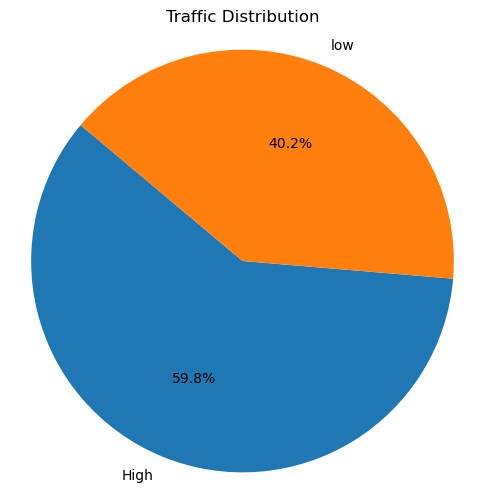

In [22]:
traffic_counts = df['traffic'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(traffic_counts, 
        labels=traffic_counts.index, 
        autopct='%1.1f%%', 
        startangle=140)
plt.title('Traffic Distribution')
plt.axis('equal')
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


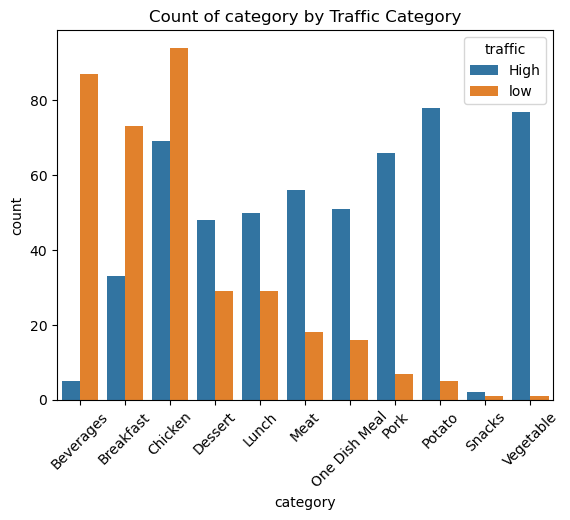

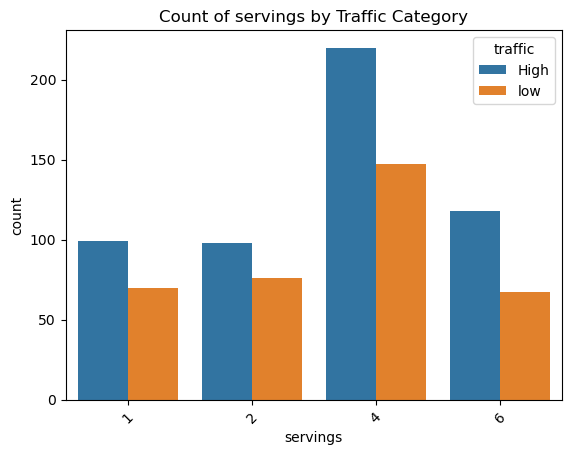

In [23]:
for feature in cat_cols:
    sns.countplot(x=feature, hue='traffic', data=df)
    plt.title(f'Count of {feature} by Traffic Category')
    plt.xticks(rotation=45)
    plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be chan

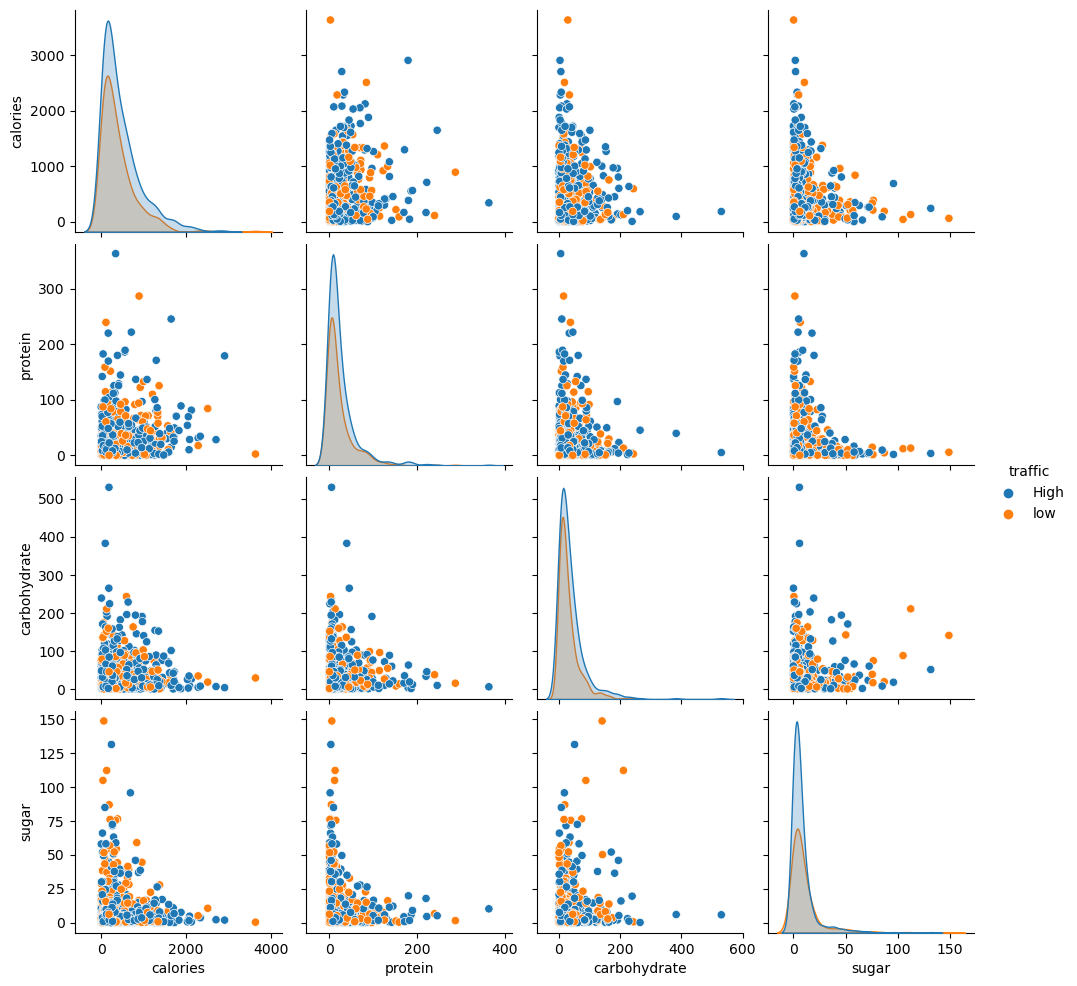

In [24]:
sns.pairplot(df, hue='traffic', vars=nutrient_cols)
plt.show()

In [25]:
#  calories
calories_thresholds = df['calories'].quantile([0.20, 0.85]).values
df['calories_bucket'] = pd.cut(df['calories'], bins=[-np.inf, calories_thresholds[0], calories_thresholds[1], np.inf], labels=['low', 'medium', 'high'])


In [26]:
protein_thresholds = df['protein'].quantile([0.40, 0.85]).values
df['protein_bucket'] = pd.cut(df['protein'], bins=[-np.inf, protein_thresholds[0], protein_thresholds[1], np.inf], labels=['low', 'medium', 'high'])

In [27]:
sugar_thresholds = df['sugar'].quantile([0.65, 0.90]).values
df['sugar_bucket'] = pd.cut(df['sugar'], bins=[-np.inf, sugar_thresholds[0], sugar_thresholds[1], np.inf], labels=['low', 'medium', 'high'])

In [28]:
carbohydrate_thresholds = df['carbohydrate'].quantile([0.50, 0.85]).values
df['carbohydrate_bucket'] = pd.cut(df['carbohydrate'], bins=[-np.inf, carbohydrate_thresholds[0], carbohydrate_thresholds[1], np.inf], labels=['low', 'medium', 'high'])

In [29]:
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,traffic,calories_bucket,protein_bucket,sugar_bucket,carbohydrate_bucket
1,2,35.48,38.56,0.66,0.92,Potato,4,High,low,low,low,medium
2,3,914.28,42.68,3.09,2.88,Breakfast,1,low,high,low,low,medium
3,4,97.03,30.56,38.63,0.02,Beverages,4,High,medium,low,high,medium
4,5,27.05,1.85,0.80,0.53,Beverages,4,low,low,low,low,low
5,6,691.15,3.46,1.65,53.93,One Dish Meal,2,High,medium,high,low,low


In [30]:
# function to compare buckets by traffic

def plot_bucket_distribution(df, nutrient_bucket, title):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=nutrient_bucket, hue='traffic', data=df, order=['low', 'medium', 'high'])
    plt.title(title)
    plt.xlabel('Nutrient Bucket')
    plt.ylabel('Count')
    plt.legend(title='Traffic')
    plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


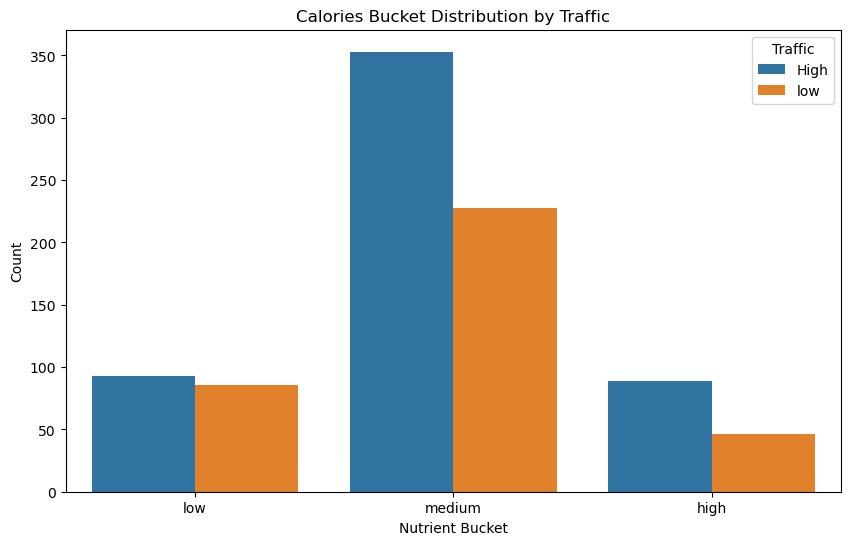

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


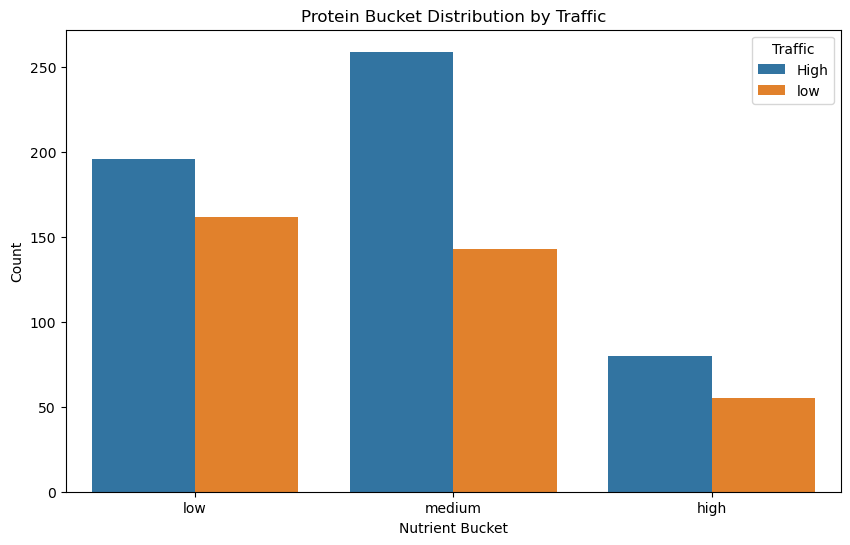

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


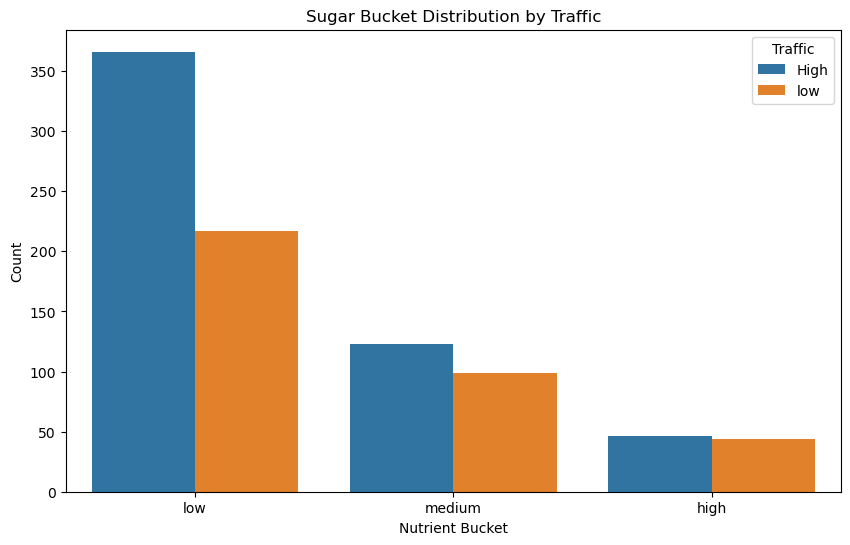

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


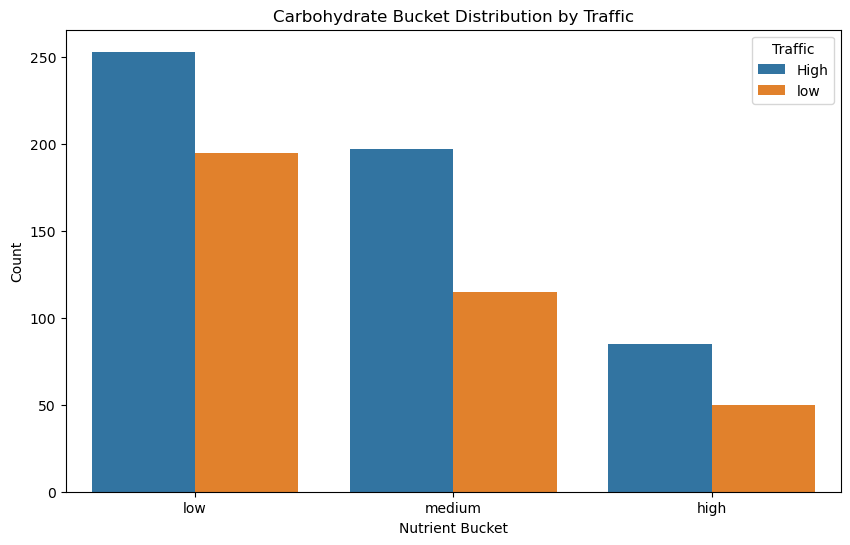

In [31]:
plot_bucket_distribution(df, 'calories_bucket', 'Calories Bucket Distribution by Traffic')
plot_bucket_distribution(df, 'protein_bucket', 'Protein Bucket Distribution by Traffic')
plot_bucket_distribution(df, 'sugar_bucket', 'Sugar Bucket Distribution by Traffic')
plot_bucket_distribution(df, 'carbohydrate_bucket', 'Carbohydrate Bucket Distribution by Traffic')

In [37]:
!pip3 install xgboost

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 653.6 kB/s eta 0:02:33
   ---------------------------------------- 0.1/99.8 MB 1.1 MB/s eta 0:01:32
   ---------------------------------------- 0.2/99.8 MB 1.4 MB/s eta 0:01:12
   ---------------------------------------- 0.3/99.8 MB 1.4 MB/s eta 0:01:14
   ---------------------------------------- 0.4/99.8 MB 1.5 MB/s eta 0:01:05
   ---------------------------------------- 0.4/99.8 MB 1.4 MB/s eta 0:01:09
   ---------------------------------------- 0.5/99.8 MB 1.5 MB/s eta 0:01:08
   ---------------------------------------- 0.5/99.8 MB 1.5 MB/s eta 0:01:08
   ---------------------------------------- 0.6/99.8 MB 1.2 MB/s eta 0:01:23
   ---------------------------------------- 0.6/99.8 MB 1.2 MB/s eta 0:01:21
   ---------------------------------------- 0.6/99.8 MB 1.2 MB/s eta 0:01:21
   ---------------------------------------- 0.6/99.8 MB 1.0 MB/s eta 0:01:35
   -

In [38]:
# import required libraries (ML Development)

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, precision_score, confusion_matrix

In [39]:
# Min max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(df[nutrient_cols])

In [40]:
# Log transformation
df[nutrient_cols] = np.log1p(df[nutrient_cols])

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be chan

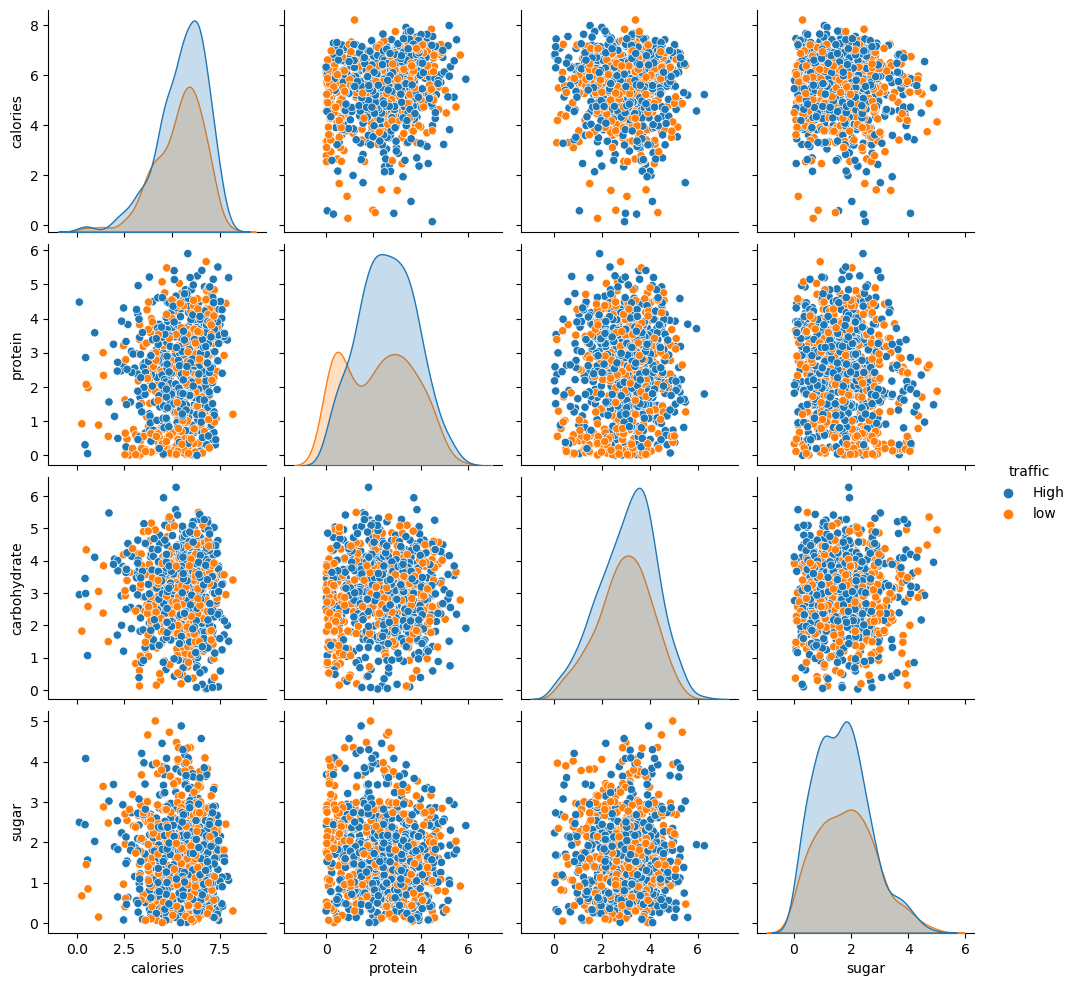

In [41]:
sns.pairplot(df, hue='traffic', vars=nutrient_cols)
plt.show()

In [42]:
# One-Hot Encoding for categorical variables
df = pd.get_dummies(df, columns=['category'])

# Label encode bucket columns
label_encoder = LabelEncoder()

bucket_columns = ['calories_bucket', 'protein_bucket', 'sugar_bucket', 'carbohydrate_bucket']

for col in bucket_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [43]:
# Making 'traffic' column a binary column
df['traffic'] = df['traffic'].replace({'High': 0, 'low': 1})

In [44]:
df.columns

Index(['recipe', 'calories', 'carbohydrate', 'sugar', 'protein', 'servings',
       'traffic', 'calories_bucket', 'protein_bucket', 'sugar_bucket',
       'carbohydrate_bucket', 'category_Beverages', 'category_Breakfast',
       'category_Chicken', 'category_Dessert', 'category_Lunch',
       'category_Meat', 'category_One Dish Meal', 'category_Pork',
       'category_Potato', 'category_Snacks', 'category_Vegetable'],
      dtype='object')

In [45]:
# Define features and target
drop_cols = ['recipe', 'traffic']

X = df.drop(drop_cols, axis=1)
y = df['traffic']

# 90:10 train test split with stratify enabled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

In [46]:
X.head()

,calories,carbohydrate,sugar,protein,servings,calories_bucket,protein_bucket,sugar_bucket,carbohydrate_bucket,category_Beverages,category_Breakfast,category_Chicken,category_Dessert,category_Lunch,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Snacks,category_Vegetable
1,3.596764,3.677819,0.506818,0.652325,4,1,1,1,2,False,False,False,False,False,False,False,False,True,False,False
2,6.819230,3.776890,1.408545,1.355835,1,0,1,1,2,False,True,False,False,False,False,False,False,False,False,False
3,4.585274,3.451890,3.679586,0.019803,4,2,1,0,2,True,False,False,False,False,False,False,False,False,False,False
4,3.333989,1.047319,0.587787,0.425268,4,1,1,1,1,True,False,False,False,False,False,False,False,False,False,False
5,6.539803,1.495149,0.974560,4.006060,2,2,0,1,1,False,False,False,False,False,False,True,False,False,False,False


In [47]:
h_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

xgb = XGBClassifier()
precision_scorer = make_scorer(precision_score, pos_label=0)

grid_search = GridSearchCV(estimator=xgb, param_grid=h_params, cv=5, n_jobs=-1, scoring=precision_scorer)

grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")

best_estimator = grid_search.best_estimator_
test_precision = best_estimator.score(X_test, y_test)
print("Test Precision:", test_precision)


Best Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1.0}
Test Precision: 0.8333333333333334


In [48]:
xgb = XGBClassifier(colsample_bytree=0.9, 
                    learning_rate=0.01, 
                    max_depth=3, 
                    n_estimators=100,
                    subsample=1.0)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

XGB Precision: 0.7123287671232876


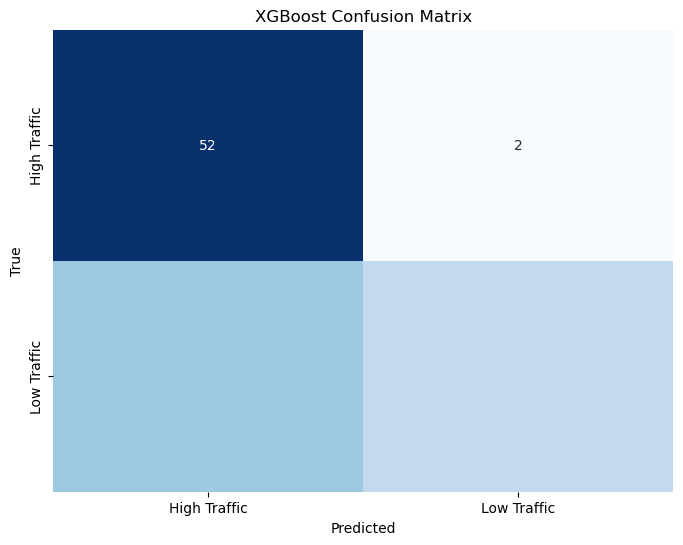

In [49]:
# Evaluation

y_pred = xgb.predict(X_test)

# precision
test_precision = precision_score(y_test, y_pred, pos_label=0)
print("XGB Precision:", test_precision)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('XGBoost Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['High Traffic', 'Low Traffic'])
plt.yticks(ticks=[0.5, 1.5], labels=['High Traffic', 'Low Traffic'])
plt.show()

In [50]:
# params
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

svc = SVC()
precision_scorer = make_scorer(precision_score, pos_label=0)

grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring=precision_scorer)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_svc_model = grid_search.best_estimator_

accuracy = best_svc_model.score(X_test, y_test)
print("Best parameters:", best_params)
print("Accuracy of the best model:", accuracy)


Best parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy of the best model: 0.8222222222222222


In [51]:
svc = SVC(C=0.1, gamma='scale', kernel='linear', random_state=42)
svc.fit(X_train, y_train)

SVC(C=0.1, kernel='linear', random_state=42)

SVC Precision:  0.8653846153846154


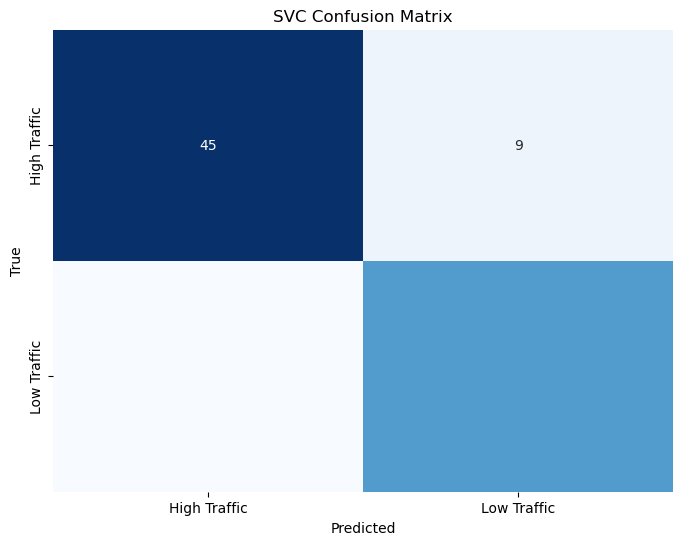

In [52]:
# evaluation
svc_y_pred = svc.predict(X_test)

# precision
svc_test_precision = precision_score(y_test, svc_y_pred, pos_label=0)
print("SVC Precision: ", svc_test_precision)

# confusion matrix
svc_cm = confusion_matrix(y_test, svc_y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(svc_cm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('SVC Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['High Traffic', 'Low Traffic'])
plt.yticks(ticks=[0.5, 1.5], labels=['High Traffic', 'Low Traffic'])
plt.show()

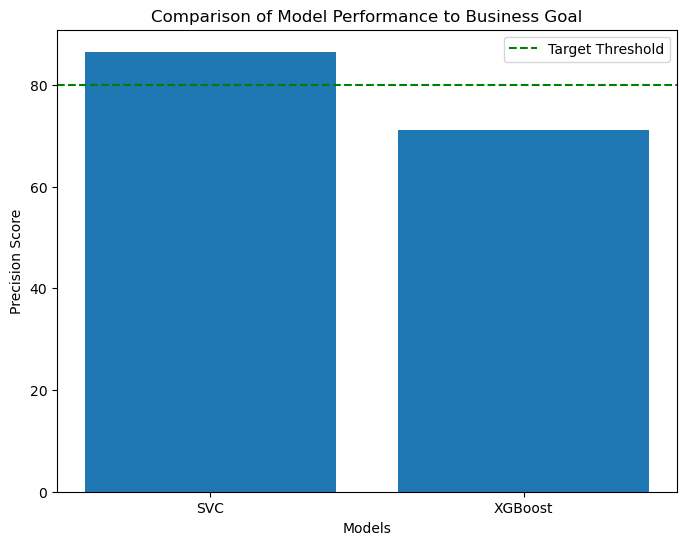

In [53]:
threshold = 80

models = ['SVC', 'XGBoost']

precision_scores = [svc_test_precision*100, test_precision*100]

plt.figure(figsize=(8, 6))
plt.bar(models, precision_scores)
plt.axhline(y=threshold, color='green', linestyle='--', label='Target Threshold')

plt.xlabel('Models')
plt.ylabel('Precision Score')
plt.title('Comparison of Model Performance to Business Goal')
plt.legend()
plt.show()
